In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('NY property data.csv')
data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [3]:
data_orig=data.copy()

In [4]:
data.isnull().sum()

RECORD            0
BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: int64

<b>Filling in missing ZIP</b>

In [5]:
missing_zips=np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

29890

In [6]:
# If the zip on both the record before and after the record 
# with the missing zip are the same, 
# replace by that zip code
for i in range(len(missing_zips)):
    if data.loc[missing_zips[i]+1,'ZIP']==data.loc[missing_zips[i]-1,'ZIP']:
        data.loc[missing_zips[i],'ZIP']=data.loc[missing_zips[i]-1,'ZIP']

In [7]:
missing_zips=np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

16437

In [8]:
for i in range(len(missing_zips)):
    data.loc[missing_zips[i],'ZIP']=data.loc[missing_zips[i]-1,'ZIP']

In [9]:
missing_zips=np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

0

<b>Filling in missing STORIES</b>

In [10]:
temp=data[data['STORIES'].isnull()]
len(temp)

56264

In [11]:
temp['TAXCLASS'].value_counts()

1B    24736
4     22354
3      4635
2      3435
1       897
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [12]:
mean_stories=data.groupby('TAXCLASS')['STORIES'].mean()
mean_stories

TAXCLASS
1      2.111641
1A     1.656837
1B     4.000000
1C     3.052748
1D     1.068966
2     16.095110
2A     2.844574
2B     4.004494
2C     4.745097
3      1.333333
4      5.446968
Name: STORIES, dtype: float64

In [13]:
len(data[data['STORIES']==0])

0

In [14]:
# Filling in with the average by that record's TAXCLASS
data['STORIES']=data['STORIES'].fillna(value=0)
for index in mean_stories.index:
    data.loc[(data['STORIES']==0)&(data['TAXCLASS']==index),'STORIES']=mean_stories[index]

<b>Filling in Missing FULLVAL, AVLAND, AVTOT</b>

In [15]:
data['FULLVAL'].replace('NaN',0)
temp_fullval=data[data['FULLVAL']!=0]
mean_fullval=temp_fullval.groupby('TAXCLASS')['FULLVAL'].mean()
print(mean_fullval)

TAXCLASS
1     5.698435e+05
1A    3.352842e+05
1B    5.613639e+05
1C    7.615359e+05
1D    2.233614e+07
2     7.998018e+05
2A    8.640037e+05
2B    1.252989e+06
2C    7.728799e+05
3     1.112765e+05
4     3.211928e+06
Name: FULLVAL, dtype: float64


In [16]:
data['AVLAND'].replace('NaN',0)
temp_avland=data[data['AVLAND']!=0]
mean_avland=temp_avland.groupby('TAXCLASS')['AVLAND'].mean()
print(mean_avland)

TAXCLASS
1      14896.433976
1A      2247.369138
1B     14781.268478
1C      8225.658898
1D    709303.793103
2      90830.095031
2A     31363.390619
2B     54446.810503
2C     25639.066531
3      43368.352941
4     600949.433397
Name: AVLAND, dtype: float64


In [17]:
data['AVTOT'].replace('NaN',0)
temp_avtot=data[data['AVTOT']!=0]
mean_avtot=temp_avland.groupby('TAXCLASS')['AVTOT'].mean()
print(mean_avtot)

TAXCLASS
1     2.501609e+04
1A    1.436972e+04
1B    1.478410e+04
1C    2.898447e+04
1D    1.166866e+06
2     3.599141e+05
2A    7.961158e+04
2B    1.785982e+05
2C    1.170552e+05
3     5.007444e+04
4     1.488705e+06
Name: AVTOT, dtype: float64


In [18]:
# Filling in with the average by that record's TAXCLASS
for index in mean_fullval.index:
    data.loc[(data['FULLVAL']==0)&(data['TAXCLASS']==index),'FULLVAL']=mean_fullval[index]
    data.loc[(data['AVLAND']==0)&(data['TAXCLASS']==index),'AVLAND']=mean_avland[index]
    data.loc[(data['AVTOT']==0)&(data['TAXCLASS']==index),'AVTOT']=mean_avtot[index]

<b>Filling in missing Lot and Building sizes</b>

In [19]:
# Calculate groupwise average. 
# Replace 0 by NAs so they are not counted in calculating mean.
data.loc[data['LTFRONT']==0,'LTFRONT']=np.nan
data.loc[data['LTDEPTH']==0,'LTDEPTH']=np.nan
data.loc[data['BLDFRONT']==0,'BLDFRONT']=np.nan
data.loc[data['BLDDEPTH']==0,'BLDDEPTH']=np.nan
data.loc[data['LTFRONT']==1,'LTFRONT']=np.nan
data.loc[data['LTDEPTH']==1,'LTDEPTH']=np.nan
data.loc[data['BLDFRONT']==1,'BLDFRONT']=np.nan
data.loc[data['BLDDEPTH']==1,'BLDDEPTH']=np.nan

In [20]:
mean_LTFRONT=data.groupby(data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH=data.groupby(data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT=data.groupby(data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH=data.groupby(data['TAXCLASS'])['BLDDEPTH'].mean()

In [21]:
for index in mean_LTFRONT.index:
    data.loc[(data['LTFRONT'].isnull())&(data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]    
    data.loc[(data['LTDEPTH'].isnull())&(data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    data.loc[(data['BLDFRONT'].isnull())&(data['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    data.loc[(data['BLDDEPTH'].isnull())&(data['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

In [22]:
# Convert ZIP to an integer rather than a float
data['ZIP']=data['ZIP'].astype(str)
data['zip3']=data['ZIP'].str[:3]

<b>Create 3 sizes</b>

In [23]:
data['ltsize']=data['LTFRONT']*data['LTDEPTH']
data['bldsize']=data['BLDFRONT']*data['BLDDEPTH']
data['bldvol']=data['bldsize']*data['STORIES']

<b>Normalize the value fields by each of the 3 sizes</b>

In [24]:
data['r1']=data['FULLVAL']/data['ltsize']
data['r2']=data['FULLVAL']/data['bldsize']
data['r3']=data['FULLVAL']/data['bldvol']
data['r4']=data['AVLAND']/data['ltsize']
data['r5']=data['AVLAND']/data['bldsize']
data['r6']=data['AVLAND']/data['bldvol']
data['r7']=data['AVTOT']/data['ltsize']
data['r8']=data['AVTOT']/data['bldsize']
data['r9']=data['AVTOT']/data['bldvol']

<b>Create the grouped averages</b>

In [25]:
ninevars=['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean=data.groupby('ZIP')[ninevars].mean()
zip3_mean=data.groupby('zip3')[ninevars].mean()
taxclass_mean=data.groupby('TAXCLASS')[ninevars].mean()
borough_mean=data.groupby('B')[ninevars].mean()

<b>Append 36 additional variables</b>

In [26]:
data=data.join(zip5_mean,on='ZIP',rsuffix='_zip5')
data=data.join(zip3_mean,on='zip3',rsuffix='_zip3')
data=data.join(taxclass_mean,on='TAXCLASS',rsuffix='_taxclass')
data=data.join(borough_mean,on='B',rsuffix='_boro')
rsuffix=['_zip5','_zip3','_taxclass','_boro']

In [27]:
for var in ninevars:
    for r in rsuffix:
        data[str(var)+r]=data[var]/data[str(var)+r]

In [28]:
variables=['RECORD','r1','r2','r3','r4','r5','r6','r7','r8','r9',
          'r1_zip5','r2_zip5','r3_zip5','r4_zip5','r5_zip5','r6_zip5','r7_zip5','r8_zip5','r9_zip5',
          'r1_zip3','r2_zip3','r3_zip3','r4_zip3','r5_zip3','r6_zip3','r7_zip3','r8_zip3','r9_zip3',
          'r1_taxclass','r2_taxclass','r3_taxclass','r4_taxclass','r5_taxclass','r6_taxclass','r7_taxclass','r8_taxclass','r9_taxclass',
          'r1_boro','r2_boro','r3_boro','r4_boro','r5_boro','r6_boro','r7_boro','r8_boro','r9_boro']

In [29]:
data=data[variables]

<b>Summary statistics</b>

In [30]:
stats = data.describe().transpose()
stats.to_csv('stats_on_vars.csv')

<b>Before PCA, z scale the variables</b>

In [31]:
data.drop(columns='RECORD',inplace=True)

In [32]:
data=(data-data.mean())/data.std()

<b>Compute most of the PC components and look at the scree plot</b>

(0.0, 1.0)

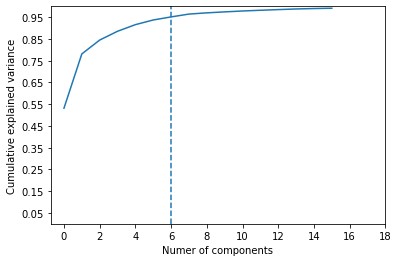

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=.99,svd_solver='full')
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numer of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.05,1.1,step=.1))
plt.xticks(np.arange(0,20,step=2))
plt.axvline(x=6,linestyle='--')
plt.ylim(0,1)

<b>Keep the top 6 PCs. Recompute them</b>

In [34]:
pca=PCA(n_components=6)
princ_comps=pca.fit_transform(data)
data_pca=pd.DataFrame(princ_comps,columns=['PC'+str(i) for i in range(1,pca.n_components_+1)])

In [35]:
data_pca.shape

(1070994, 6)

<b>After PCA, z scale the varibales (PCs) again</b>

In [36]:
pca_mean=data_pca.mean()
pca_sd=data_pca.std()
data_pca=(data_pca-pca_mean)/pca_sd

In [37]:
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,4.843142e-16,-5.926529e-16,1.168304e-16,-5.927111e-16,2.568180e-15,-1.663751e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473123e-01,-3.121770e+02,-4.693497e+02,-1.839580e+02,-3.911585e+02,-2.618055e+02
25%,-6.862403e-02,-9.947863e-02,-6.131603e-02,-1.448078e-01,-1.114987e-01,-7.018291e-02
50%,-1.944495e-02,-4.105366e-02,1.099318e-02,-2.396821e-02,-5.630886e-02,7.509532e-04
75%,1.192503e-02,2.033199e-02,1.500593e-01,5.505630e-02,3.222929e-02,1.235236e-01
max,5.229280e+02,6.036698e+02,6.141779e+02,3.898520e+02,4.478940e+02,4.230686e+02


<b>Model 1: z score outliers</b>

In [38]:
p=2
one_over_p=1/p
score1=(((data_pca).abs()**p).sum(axis=1))**one_over_p

<b>Model 2: autoencoder error</b>

In [39]:
from keras.models import Model
from keras.layers import Input, Dense

In [40]:
# placeholder for input
data_in=Input(shape=(6,))
# dimension of the encoded data
encoded_dim=3
# encoded representation of the data
encoded=Dense(encoded_dim,activation='tanh')(data_in)
# reconstruction of the input
decoded=Dense(6,activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder=Model(data_in,decoded)

autoencoder.compile(optimizer='adam',loss='mean_squared_error')

autoencoder.fit(data_pca,data_pca,epochs=5,shuffle=True,validation_data=(data_pca,data_pca))

pca_out=autoencoder.predict(data_pca)
error=pca_out-data_pca
p=2
oop=1/p

score2=((error.abs()**p).sum(axis=1))**oop

Epoch 1/5
33469/33469 [==============================] - 73s 2ms/step - loss: 1.0114 - val_loss: 0.9299
Epoch 2/5
33469/33469 [==============================] - 73s 2ms/step - loss: 0.8868 - val_loss: 0.9273
Epoch 3/5
33469/33469 [==============================] - 72s 2ms/step - loss: 0.7043 - val_loss: 0.9271
Epoch 4/5
33469/33469 [==============================] - 71s 2ms/step - loss: 0.6700 - val_loss: 0.9272
Epoch 5/5
33469/33469 [==============================] - 71s 2ms/step - loss: 0.8659 - val_loss: 0.9261


<b>Make the final score as the average ranking</b>

In [41]:
scores=pd.DataFrame(score1)
scores.columns=['score1']
scores['score2']=score2
scores['score1 rank']=scores['score1'].rank()
scores['score2 rank']=scores['score2'].rank()
scores['final']=(scores['score1 rank']+scores['score2 rank'])/2
top_records=scores.sort_values(['final'],ascending=False).head(100).index

In [42]:
top_records

Int64Index([ 917941,  565391,   85885,   67128,  684703,  690832,  915468,
              44247,  565397,   39769, 1059882,  116646,  556608,  501142,
                418,   33750,  918203,  738017,  957063, 1065869,  139725,
             964933,  252833,  927226,   48220,  918857,   19241,  106680,
             151043,  104410,  932860,  915469,  684562,  964947,  610681,
             330290,  771149,  985596,  245572,  752487,   60468,  691878,
             649674,   97083,  973911,  109066,  923882,  556910,  153069,
             665157,   85883,  773561,   56135,  918204,  764311,  131602,
             209713,   86945,  621688,  209711,  216947,  934792,  817348,
             918304,   47983,  464854,  720599,   26242,  991516,  177645,
             248664,  174538,   12075,  994818,  994816,  994814,  994812,
             243058,  334956,   79816,  994820,  398277,  992070,  638992,
             773734,  991782,  918919,  934749,   88388,    7053,  330291,
              93878,  340

(0.1, 2141173.0413904563)

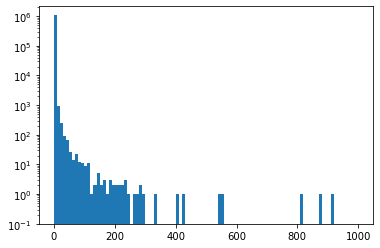

In [43]:
plt.hist(score1,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

(0.1, 2141948.7150050127)

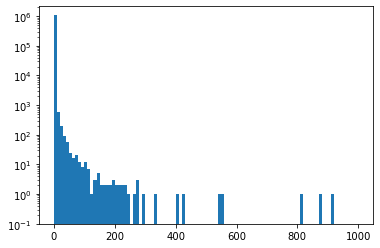

In [44]:
plt.hist(score2,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

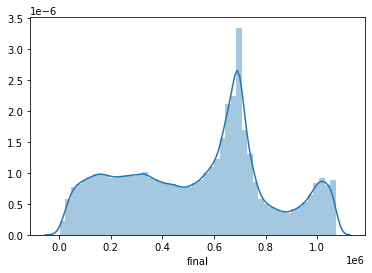

In [45]:
import seaborn as sns
sns.distplot(scores['final'])

In [46]:
data_top_100_scores=scores.sort_values(['final'],ascending=False).head(100)

In [47]:
datanew=data_orig.iloc[top_records,:]
data_top_100=datanew.join(data_top_100_scores[['score1 rank','score2 rank','final']])

In [48]:
data_top_100.to_csv('top_100_version1.csv')

<b>Algorithm modifications </b>

In [49]:
# p for score1: 1
# p for score2: 3
# number of PCs kept: 8
# changes to the autoencoder: compress the data records from 8 to 4 dimensions and then expand them back to 8 dimensions.

In [50]:
# Keep the top 8 PCs
pca=PCA(n_components=8)
princ_comps=pca.fit_transform(data)
data_pca=pd.DataFrame(princ_comps,columns=['PC'+str(i) for i in range(1,pca.n_components_+1)])
# Z-scale the data again
pca_mean=data_pca.mean()
pca_sd=data_pca.std()
data_pca=(data_pca-pca_mean)/pca_sd
# Score 1
p=1
one_over_p=1/p
score1=(((data_pca).abs()**p).sum(axis=1))**one_over_p
# Score 2
data_in=Input(shape=(8,))
encoded_dim=4
encoded=Dense(encoded_dim,activation='tanh')(data_in)
decoded=Dense(8,activation='tanh')(encoded)
autoencoder=Model(data_in,decoded)
autoencoder.compile(optimizer='adam',loss='mean_squared_error')
autoencoder.fit(data_pca,data_pca,epochs=5,shuffle=True,validation_data=(data_pca,data_pca))
pca_out=autoencoder.predict(data_pca)
error=pca_out-data_pca
p=3
oop=1/p
score2=((error.abs()**p).sum(axis=1))**oop

Epoch 1/5
33469/33469 [==============================] - 72s 2ms/step - loss: 1.1609 - val_loss: 0.9217
Epoch 2/5
33469/33469 [==============================] - 71s 2ms/step - loss: 0.9106 - val_loss: 0.9205
Epoch 3/5
33469/33469 [==============================] - 74s 2ms/step - loss: 1.1145 - val_loss: 0.9200
Epoch 4/5
33469/33469 [==============================] - 71s 2ms/step - loss: 1.0904 - val_loss: 0.9202
Epoch 5/5
33469/33469 [==============================] - 73s 2ms/step - loss: 0.7805 - val_loss: 0.9198


In [51]:
scores_2=pd.DataFrame(score1)
scores_2.columns=['score1']
scores_2['score2']=score2
scores_2['score1 rank']=scores_2['score1'].rank()
scores_2['score2 rank']=scores_2['score2'].rank()
scores_2['final']=(scores_2['score1 rank']+scores_2['score2 rank'])/2
top_records_2=scores_2.sort_values(['final'],ascending=False).head(100).index
data_top_100_scores_2=scores_2.sort_values(['final'],ascending=False).head(100)
datanew_2=data_orig.iloc[top_records_2,:]
data_top_100_2=datanew_2.join(data_top_100_scores_2[['score1 rank','score2 rank','final']])
data_top_100_2.to_csv('top_100_version2.csv')

In [62]:
data_top_100_2 = data.iloc[top_records_2]
data_top_100_2['RECORD'] = (data_top_100_2.index + 1).astype(int)
data_top_100_2.set_index('RECORD',inplace=True)
data_top_100_2

<ipython-input-62-91006208f10b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_100_2['RECORD'] = (data_top_100_2.index + 1).astype(int)


,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,...,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
RECORD,,,,,,,,,,,,,,,,,,,,,
565392,512.765210,328.137810,93.955048,861.816504,351.253292,98.049397,573.033241,267.519796,89.549858,508.653468,...,75.315340,461.863588,304.868676,54.703561,938.887683,553.119217,175.573719,726.151071,354.612473,134.353739
917942,0.535636,28.155462,14.607118,15.196011,323.460897,163.953849,26.318384,641.545643,389.987533,1.492310,...,328.352110,0.783165,26.629905,7.710688,19.701153,379.852884,194.948448,45.398378,752.629342,444.211547
85886,-0.141711,471.007306,735.572763,0.231539,501.836908,763.158673,0.094670,383.932975,700.222268,-0.165887,...,589.640230,-0.220949,467.560770,833.464564,0.025431,254.237338,624.123556,-0.037172,147.129116,581.421286
684704,209.994955,-0.159183,-0.138220,20.610045,-0.024656,-0.019945,13.647789,-0.040397,-0.031106,224.806257,...,-0.000002,274.043849,-0.163587,-0.088594,26.708414,-0.027038,-0.025624,23.584207,-0.038468,-0.037462
67129,81.640121,466.558209,133.630975,132.685538,481.468505,134.402892,91.448411,380.307753,127.312210,33.568954,...,107.119819,50.302149,463.144208,151.484805,32.554357,243.917715,109.908658,23.018042,145.739631,105.702266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79817,-0.234077,44.390307,69.502636,0.077180,47.529543,72.300283,-0.008507,36.316146,66.276789,-0.313138,...,55.714130,-0.278011,44.063547,78.829559,-0.012478,24.063145,59.119325,-0.063211,13.893586,55.021168
33564,-0.145511,35.583941,55.753402,0.226295,38.262848,58.208560,0.090426,29.140528,53.190682,-0.259404,...,44.692655,-0.223296,35.321581,63.252140,0.024142,19.368187,47.594701,-0.038243,11.143295,44.155048
6094,-0.199936,12.422920,19.592479,0.126282,12.906381,19.649361,0.029631,10.268423,18.773806,-0.134188,...,15.705827,-0.256919,12.329932,22.283033,-0.000419,6.521368,16.059859,-0.053586,3.909943,15.576805


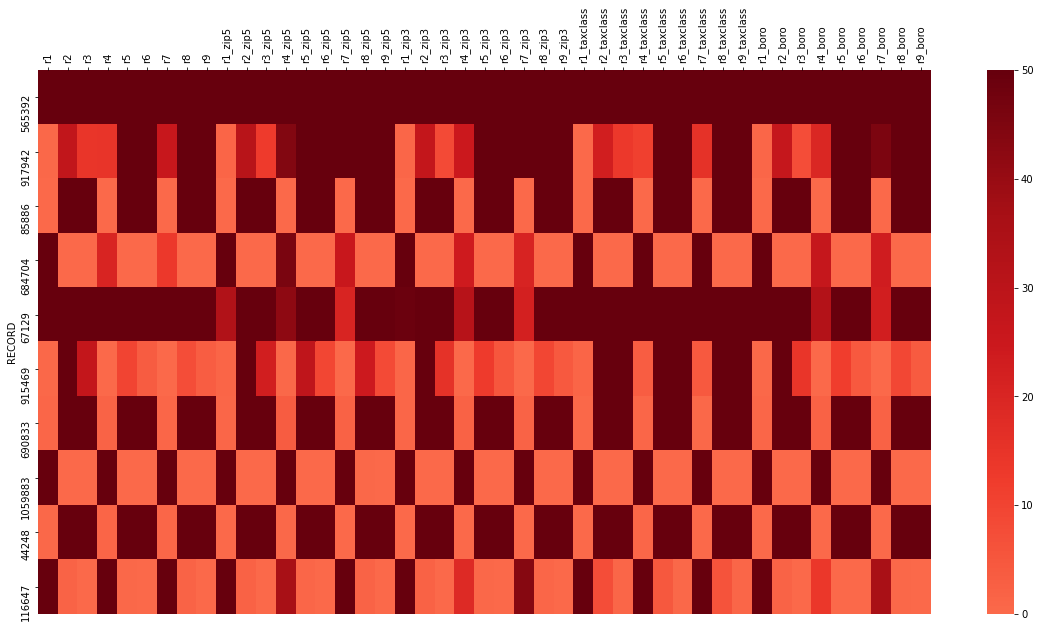

In [63]:
data_top_100_2_abs = data_top_100_2.abs()
data_heatmap = data_top_100_2.abs().head(10)
plt.rcParams['figure.figsize'] = (20,10)
ax = sns.heatmap(data_heatmap, center=0, vmin=0, vmax=50, cmap='Reds')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.savefig('heatmap.png')

In [73]:
proportion=(len(top_records_2)-len(top_records_2.difference(top_records)))/len(top_records_2)*100
print(f'In the modified top 100 records, {proportion}% are the same as before.')

In the modified top 100 records, 93.0% are the same as before.
